1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() 
# Con esto me descargo la base de datos.

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Para eliminar los targets que no sean 1 o 9 hay varias posibilidadades

1ª utilizando un for

In [5]:
X_y = list(zip(digits.data, digits.target))
X_y_one_nine = []
for image, target in X_y:
    if target ==1 or target == 9:
        X_y_one_nine.append((image,target))

Ahora tengo que separar de X_y_one_nine los target. Pero lo dejaremos aqui

2ª pasando el conjunto de datos a un dataframe donde elimino los targets que no sean el 1 o el 9

In [6]:
df2 = pd.DataFrame(data=np.c_[digits['data'], digits['target']])
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


En el df2 la columna 64 es el target. 
Con una máscara me quedo solamente con los valores de la columna 64 que son 1 u 9.

In [7]:
df = df2[(df2[64]==1) | (df2[64]==9)]
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


In [8]:
# Ahora hay que obtener un array con las X que serán los data (columna 0 a 63).
X1 = df.iloc[ : , :-1].values
X1

array([[ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0., 11., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [9]:
X1.shape


(362, 64)

In [10]:
# El array de los valores del target (y)
y1 = df[64].values

In [11]:
y1.shape

(362,)

3ª pasando el conjunto de datos a un dataframe donde elimino los targets que no sean el 1 o el 9

In [12]:
# Saco el target
digits.target.shape

(1797,)

In [13]:
# Creo un numpy array solo con los registros de data correspondientes al target (label 1 al 9)
digits.data = (digits.data[(digits.target==1) | (digits.target==9)])

In [14]:
x = digits.data.shape
x

(362, 64)

In [15]:
# Creo un numpy array solo con los registros de target correspondientes a los valores 1 y 9.
digits.target = (digits.target[(digits.target==1) | (digits.target==9)])

In [16]:
y = digits.target
y.shape

(362,)

In [17]:
#Divido los datos en conjunto de entrenamiento y de test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
#Entreno el algoritmo y estoy usando todos los datos para entrenar
logisticRegr.fit(x_train, y_train)

LogisticRegression()

Voy a hacer la predicción con uno de las imagenes.

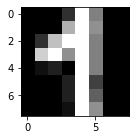

In [19]:
plt.rcParams['figure.figsize'] =2 , 2
first_test_image = x_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [20]:
# Predict for One Observation (image)
logisticRegr.predict(x_test[1].reshape(1, -1))

array([1])

PROBABILIDAD

Veo la probabilidad de que con los valores x_test el y_test sea de una clase u otra.

In [21]:
y_pred = logisticRegr.predict(x_test)
y_pred

array([9, 1, 1, 1, 1, 9, 9, 9, 1, 9, 1, 1, 1, 1, 1, 9, 1, 9, 1, 1, 9, 9,
       9, 9, 9, 1, 1, 9, 1, 1, 9, 9, 1, 1, 9, 9, 9, 9, 1, 9, 1, 1, 1, 9,
       1, 1, 9, 1, 1, 1, 1, 9, 9, 9, 9, 9, 9, 9, 1, 9, 1, 9, 1, 9, 9, 9,
       1, 9, 9, 9, 9, 1, 1, 9, 9, 1, 1, 9, 1, 9, 9, 1, 9, 1, 1, 1, 1, 9,
       9, 1, 9])

In [22]:
# Me indica la probabilidad de que el y_pred sea un 1(primer digito del array), o que sea un 9 (segundo dígito del array)
logisticRegr.predict_proba(x_test)

array([[1.77457943e-08, 9.99999982e-01],
       [9.99990987e-01, 9.01263528e-06],
       [9.99998516e-01, 1.48374505e-06],
       [9.98625487e-01, 1.37451333e-03],
       [9.99997869e-01, 2.13078354e-06],
       [7.04487365e-08, 9.99999930e-01],
       [7.32566208e-04, 9.99267434e-01],
       [1.69311676e-03, 9.98306883e-01],
       [9.99999653e-01, 3.47109950e-07],
       [1.93370212e-02, 9.80662979e-01],
       [9.99920872e-01, 7.91282902e-05],
       [9.99971453e-01, 2.85465050e-05],
       [9.91587631e-01, 8.41236872e-03],
       [9.99999482e-01, 5.18331539e-07],
       [9.99999429e-01, 5.71247349e-07],
       [9.56604540e-02, 9.04339546e-01],
       [9.74171979e-01, 2.58280211e-02],
       [5.95345262e-06, 9.99994047e-01],
       [9.99277447e-01, 7.22552622e-04],
       [6.07392734e-01, 3.92607266e-01],
       [9.30048738e-08, 9.99999907e-01],
       [3.21249358e-04, 9.99678751e-01],
       [2.47710379e-06, 9.99997523e-01],
       [1.62473960e-05, 9.99983753e-01],
       [7.746294

In [23]:
# Me da el máximo valor que sale en el anterior array
max(logisticRegr.predict_proba(x_test)[0])

0.9999999822542057

Medición del rendimiento del modelo (Measuring Model Performance)

In [31]:
# Utilizo el método score para conocer la precición del modelo.
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

100.0 %


MIDO EL ACIERTO

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acierto = accuracy_score(y_test, y_pred)
acierto

1.0

-------------
¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

Si se mejora la precisión del algoritmo ya que tenemos solamente dos clases a predecir

MATRIZ DE CONFUSION

In [27]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm


array([[44,  0],
       [ 0, 47]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

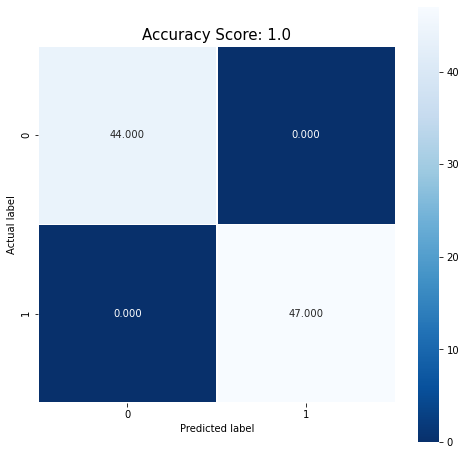

In [28]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
